<a href="https://colab.research.google.com/github/ADITYADEB072003/ML-project/blob/main/Predicting_Stock_Price_Direction_using_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('RELIANCE.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
1,2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2,2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
3,2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
4,2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0
...,...,...,...,...,...,...,...
2629,2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0
2630,2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0
2631,2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0
2632,2019-09-13,1212.000000,1228.500000,1206.900024,1225.599976,1225.599976,5919260.0


The data needed to be processed before use such that the date column should act as an index to do that and will drop date column.

In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0
...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0


Explanatory or independent variables are used to predict the value response variable. The X is a dataset that holds the variables which are used for prediction. The X consists of variables such as 'Open - Close' and 'High - Low'. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. Feel free to add more indicators and see the performance

In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2009-01-02,-6.675018,11.975006
2009-01-05,-16.712006,20.475006
2009-01-06,-2.725006,14.687988
2009-01-07,42.062012,52.750000
2009-01-09,14.187988,29.087006


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)
print("The data was split into training and testing sets using an 80/20 split.")

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, cls.predict(X_train))

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, cls.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

The data was split into training and testing sets using an 80/20 split.
Training Accuracy: 0.5358329378262933
Testing Accuracy: 0.47248576850094876


In [ ]:
df['Predicted_Signal'] = cls.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760,0.000000
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459,0.003699
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655,0.003699
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217,0.003699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621,1.747285
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603,1.757267
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120,1.737784


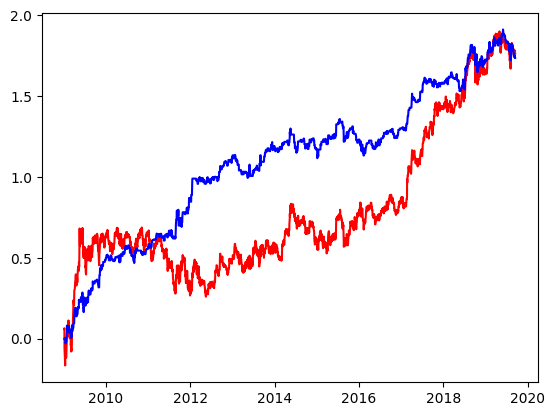

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

y_pred = cls.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")

Accuracy: 0.47248576850094876
ROC AUC: 0.4716187402754567
F1 Score: 0.5017921146953405


In [ ]:
from sklearn.metrics import accuracy_score

# Linear kernel
cls_linear = SVC(kernel='linear').fit(X_train, y_train)
y_pred_linear = cls_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear}")

# Polynomial kernel
cls_poly = SVC(kernel='poly', degree=3).fit(X_train, y_train)
y_pred_poly = cls_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy with Polynomial Kernel (degree=3): {accuracy_poly}")

# RBF kernel (default)
cls_rbf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred_rbf = cls_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf}")

# Sigmoid kernel
cls_sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)
y_pred_sigmoid = cls_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Accuracy with Sigmoid Kernel: {accuracy_sigmoid}")

Accuracy with Linear Kernel: 0.49146110056925996
Accuracy with Polynomial Kernel (degree=3): 0.48956356736242884
Accuracy with RBF Kernel: 0.47248576850094876
Accuracy with Sigmoid Kernel: 0.5047438330170778


Default RBF Kernel Performance:
Accuracy: 0.4876660341555977
ROC AUC: 0.4857661499452544
F1 Score: 0.5423728813559322

Training Accuracy: 0.5413105413105413
Testing Accuracy: 0.4876660341555977

Kernel Comparison:
linear Kernel Accuracy: 0.49146110056925996
poly Kernel Accuracy: 0.49146110056925996
rbf Kernel Accuracy: 0.4876660341555977
sigmoid Kernel Accuracy: 0.4990512333965844


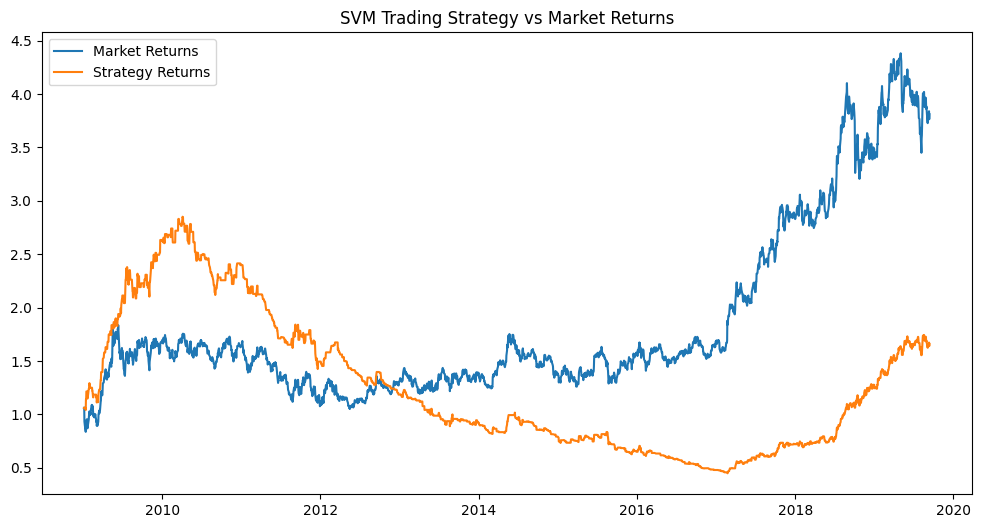


BUY Signals:
                 Close
Date                  
2009-01-05  341.462006
2009-01-13  269.388000
2009-01-16  304.337006
2009-01-21  279.962006
2009-01-23  289.037994

SELL Signals:
                 Close
Date                  
2009-01-06  342.725006
2009-01-15  285.587006
2009-01-19  307.475006
2009-01-22  284.075012
2009-01-28  318.500000


In [ ]:
# ==============================
# 1. Import Libraries
# ==============================

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 2. Load Data
# ==============================

df = pd.read_csv('RELIANCE.csv')

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# ==============================
# 3. Feature Engineering
# ==============================

df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']

X = df[['Open-Close', 'High-Low']]

# Target variable (1 if tomorrow price increases)
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Remove last row (because shift creates NaN)
X = X[:-1]
y = y[:-1]
df = df[:-1]

# ==============================
# 4. Train-Test Split (80/20)
# ==============================

split = int(0.8 * len(df))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

# ==============================
# 5. Feature Scaling (IMPORTANT)
# ==============================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 6. Train Default SVM Model
# ==============================

cls = SVC(kernel='rbf')
cls.fit(X_train, y_train)

# Predictions
y_pred = cls.predict(X_test)

# ==============================
# 7. Model Evaluation
# ==============================

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Default RBF Kernel Performance:")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")

# ==============================
# 8. Training vs Testing Accuracy
# ==============================

train_accuracy = accuracy_score(y_train, cls.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("\nTraining Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# ==============================
# 9. Kernel Comparison
# ==============================

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

print("\nKernel Comparison:")
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{k} Kernel Accuracy: {acc}")

# ==============================
# 10. Strategy Backtesting
# ==============================

# Predict on entire dataset
X_scaled = scaler.transform(X)
df['Predicted'] = cls.predict(X_scaled)

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Strategy returns
df['Strategy'] = df['Returns'] * df['Predicted']

# Cumulative returns
df['Cum_Ret'] = (1 + df['Returns']).cumprod()
df['Cum_Strategy'] = (1 + df['Strategy']).cumprod()

# ==============================
# 11. Plot Results
# ==============================

plt.figure(figsize=(12,6))
plt.plot(df['Cum_Ret'], label='Market Returns')
plt.plot(df['Cum_Strategy'], label='Strategy Returns')
plt.legend()
plt.title("SVM Trading Strategy vs Market Returns")
plt.show()
# ==============================
# 12. Generate Buy / Sell Signals
# ==============================

# Predict on entire dataset
X_scaled = scaler.transform(X)
df['Predicted'] = cls.predict(X_scaled)

# Create Signal Column
df['Signal'] = np.where(df['Predicted'] == 1, 'BUY', 'SELL')

# ==============================
# 13. Identify Buy Points
# ==============================

# Buy only when signal changes from SELL to BUY
df['Position'] = df['Predicted'].diff()

buy_signals = df[df['Position'] == 1]
sell_signals = df[df['Position'] == -1]

print("\nBUY Signals:")
print(buy_signals[['Close']].head())

print("\nSELL Signals:")
print(sell_signals[['Close']].head())

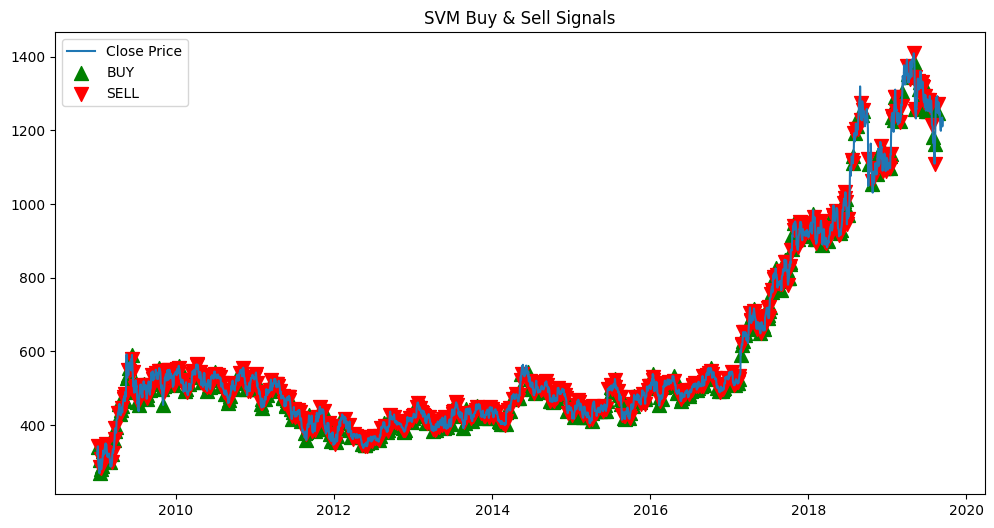

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')

# Plot Buy Signals
plt.scatter(buy_signals.index,
            buy_signals['Close'],
            marker='^',
            color='green',
            label='BUY',
            s=100)

# Plot Sell Signals
plt.scatter(sell_signals.index,
            sell_signals['Close'],
            marker='v',
            color='red',
            label='SELL',
            s=100)

plt.title("SVM Buy & Sell Signals")
plt.legend()
plt.show()

In [ ]:
# ==========================================
# REAL-TIME STOCK PREDICTION (SAFE VERSION)
# ==========================================

import yfinance as yf
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ==========================================
# 1. SETTINGS
# ==========================================

SYMBOL = "RELIANCE.NS"
TRAIN_PERIOD = "6mo"
INTERVAL = "1d"

# ==========================================
# 2. DOWNLOAD HISTORICAL DATA
# ==========================================

print("Downloading historical data...")
df = yf.download(SYMBOL, period=TRAIN_PERIOD, interval=INTERVAL)

if df.empty:
    raise ValueError("No data downloaded. Check stock symbol.")

# ==========================================
# 3. FEATURE ENGINEERING
# ==========================================

df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']

X = df[['Open-Close', 'High-Low']]

y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Remove last row due to shift
X = X[:-1]
y = y[:-1]
df = df[:-1]

# ==========================================
# 4. TRAIN-TEST SPLIT (TIME SERIES SAFE)
# ==========================================

split = int(0.8 * len(df))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

# ==========================================
# 5. FEATURE SCALING
# ==========================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# 6. TRAIN SVM MODEL
# ==========================================

model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

print("\nModel Trained Successfully ✅")

# ==========================================
# 7. EVALUATION
# ==========================================

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", round(accuracy, 4))

# ==========================================
# 8. LIVE PREDICTION LOOP (DIMENSION SAFE)
# ==========================================

print("\nStarting Live Prediction...")
print("Press CTRL+C to stop.\n")

while True:
    try:
        live_data = yf.download(SYMBOL, period="5d", interval=INTERVAL)

        if live_data.empty:
            print("No live data fetched.")
            time.sleep(60)
            continue

        latest_row = live_data.tail(1)

        # SAFE scalar extraction
        open_price = float(latest_row['Open'].values[0])
        close_price = float(latest_row['Close'].values[0])
        high_price = float(latest_row['High'].values[0])
        low_price = float(latest_row['Low'].values[0])

        open_close = open_price - close_price
        high_low = high_price - low_price

        # Proper 2D format (1 sample, 2 features)
        features = np.array([[open_close, high_low]])

        # Debug check (optional)
        # print("Feature shape:", features.shape)

        features_scaled = scaler.transform(features)

        prediction = model.predict(features_scaled)[0]

        current_price = close_price
        current_time = latest_row.index[0]

        print("Time:", current_time)
        print("Current Price:", round(current_price, 2))

        if prediction == 1:
            print("📈 BUY SIGNAL")
        else:
            print("📉 SELL SIGNAL")

        print("-----------------------------------")

        time.sleep(60)

    except KeyboardInterrupt:
        print("\nLive prediction stopped.")
        break

    except Exception as e:
        print("Error:", e)
        time.sleep(60)

[*********************100%***********************]  1 of 1 completed


Model Trained Successfully ✅
Test Accuracy: 0.44

Starting Live Prediction...
Press CTRL+C to stop.




[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1427.3
📈 BUY SIGNAL
-----------------------------------


[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1427.5
📈 BUY SIGNAL
-----------------------------------


[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1427.3
📈 BUY SIGNAL
-----------------------------------


[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1427.3
📈 BUY SIGNAL
-----------------------------------


[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1426.8
📈 BUY SIGNAL
-----------------------------------


[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1425.8
📈 BUY SIGNAL
-----------------------------------


[*********************100%***********************]  1 of 1 completed


Time: 2026-02-13 00:00:00
Current Price: 1426.7
📈 BUY SIGNAL
-----------------------------------

Live prediction stopped.


[*********************100%***********************]  1 of 1 completed

Model Accuracy: 0.44

Starting Live Chart...
Press CTRL+C to stop.




[*********************100%***********************]  1 of 1 completed


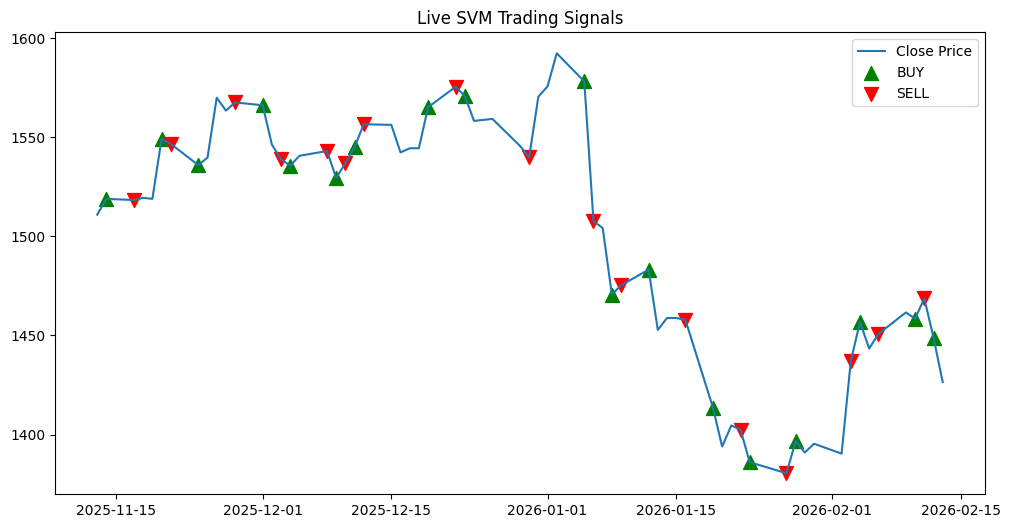

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------


[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

Updated at: 2026-02-13 00:00:00
-----------------------------------

Stopped.


In [ ]:
# ==========================================
# REAL-TIME STOCK PREDICTION WITH LIVE CHART
# ==========================================

import yfinance as yf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

plt.ion()  # Interactive mode ON

# ==========================================
# SETTINGS
# ==========================================

SYMBOL = "RELIANCE.NS"
TRAIN_PERIOD = "6mo"
INTERVAL = "1d"

# ==========================================
# DOWNLOAD HISTORICAL DATA
# ==========================================

print("Downloading historical data...")
df = yf.download(SYMBOL, period=TRAIN_PERIOD, interval=INTERVAL)

if df.empty:
    raise ValueError("No data downloaded. Check stock symbol.")

# ==========================================
# FEATURE ENGINEERING
# ==========================================

df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']

X = df[['Open-Close', 'High-Low']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

X = X[:-1]
y = y[:-1]
df = df[:-1]

# ==========================================
# TRAIN-TEST SPLIT
# ==========================================

split = int(0.8 * len(df))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

# ==========================================
# SCALING
# ==========================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# TRAIN MODEL
# ==========================================

model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print("Model Accuracy:", round(accuracy, 4))

# ==========================================
# CREATE FIGURE
# ==========================================

fig, ax = plt.subplots(figsize=(12,6))

# ==========================================
# LIVE LOOP
# ==========================================

print("\nStarting Live Chart...")
print("Press CTRL+C to stop.\n")

while True:
    try:
        live_data = yf.download(SYMBOL, period="3mo", interval=INTERVAL)

        if live_data.empty:
            time.sleep(60)
            continue

        # Feature creation
        live_data['Open-Close'] = live_data['Open'] - live_data['Close']
        live_data['High-Low'] = live_data['High'] - live_data['Low']

        X_live = live_data[['Open-Close', 'High-Low']]
        X_live_scaled = scaler.transform(X_live)

        live_data['Prediction'] = model.predict(X_live_scaled)

        # Detect signal changes
        live_data['Position'] = live_data['Prediction'].diff()

        buy_signals = live_data[live_data['Position'] == 1]
        sell_signals = live_data[live_data['Position'] == -1]

        # ==========================
        # PLOT
        # ==========================

        ax.clear()

        ax.plot(live_data['Close'], label="Close Price")

        ax.scatter(buy_signals.index,
                   buy_signals['Close'],
                   marker='^',
                   color='green',
                   s=100,
                   label='BUY')

        ax.scatter(sell_signals.index,
                   sell_signals['Close'],
                   marker='v',
                   color='red',
                   s=100,
                   label='SELL')

        ax.set_title("Live SVM Trading Signals")
        ax.legend()

        plt.draw()
        plt.pause(0.01)

        print("Updated at:", live_data.index[-1])
        print("-----------------------------------")

        time.sleep(60)

    except KeyboardInterrupt:
        print("\nStopped.")
        break

    except Exception as e:
        print("Error:", e)
        time.sleep(60)